In [91]:
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import numpy as np
import pandas as pd
import os



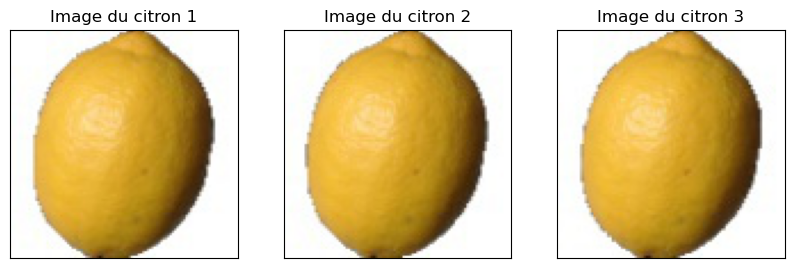

Image 1: 3_100.jpg
  Dimensions: 100x100 pixels, 3 canaux
  Aucune métadonnée trouvée.

Image 2: 4_100.jpg
  Dimensions: 100x100 pixels, 3 canaux
  Aucune métadonnée trouvée.

Image 3: 5_100.jpg
  Dimensions: 100x100 pixels, 3 canaux
  Aucune métadonnée trouvée.



In [153]:
# 1. Téléchargez un ensemble d'images (exemple Fruits-360 ou MNIST)
image_paths = ['3_100.jpg', '4_100.jpg', '5_100.jpg']

# 2. Chargez les images dans Python à l’aide des bibliothèques opencv-python.
def load_images(image_paths):
    images = []
    for path in image_paths:
        img = cv2.imread(path)
        images.append(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    return images

IMGS = load_images(image_paths)

# 3. Affichez plusieurs images dans une grille à l’aide de matplotlib.
plt.figure(figsize=(10, 6))
for i, img in enumerate(IMGS):
    plt.subplot(1, len(IMGS), i + 1)
    plt.imshow(img)
    plt.xticks([]), plt.yticks([])
    plt.title(f"Image du citron {i+1}")
plt.show()

# 4. Vérifiez les dimensions de chaque image et affichez les métadonnées associées si disponibles.
for i, path in enumerate(image_paths):
    img = cv2.imread(path)
    height, width, channels = img.shape
    print(f"Image {i+1}: {path}")
    print(f"  Dimensions: {width}x{height} pixels, {channels} canaux")
    pil_img = Image.open(path)
    exif_data = pil_img._getexif()
    if exif_data:
        print("  Métadonnées disponibles")
    else:
        print("  Aucune métadonnée trouvée.")
    print()


In [155]:
# Pré-traitement des images
# 1. Convertir les images en niveaux de gris
def gray_scale_img(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# 2. Redimensionner les images à une taille uniforme
def resize_img(img, size=(64, 64)):
    return cv2.resize(img, size, interpolation=cv2.INTER_AREA)

# 3. Normaliser les valeurs des pixels
def normalisation(img):
    return img / 255.0

IMGS_RESIZED = [resize_img(img) for img in IMGS]
IMGS_GREY = [gray_scale_img(img) for img in IMGS_RESIZED]
IMGS_NORM = [normalisation(img) for img in IMGS_GREY]


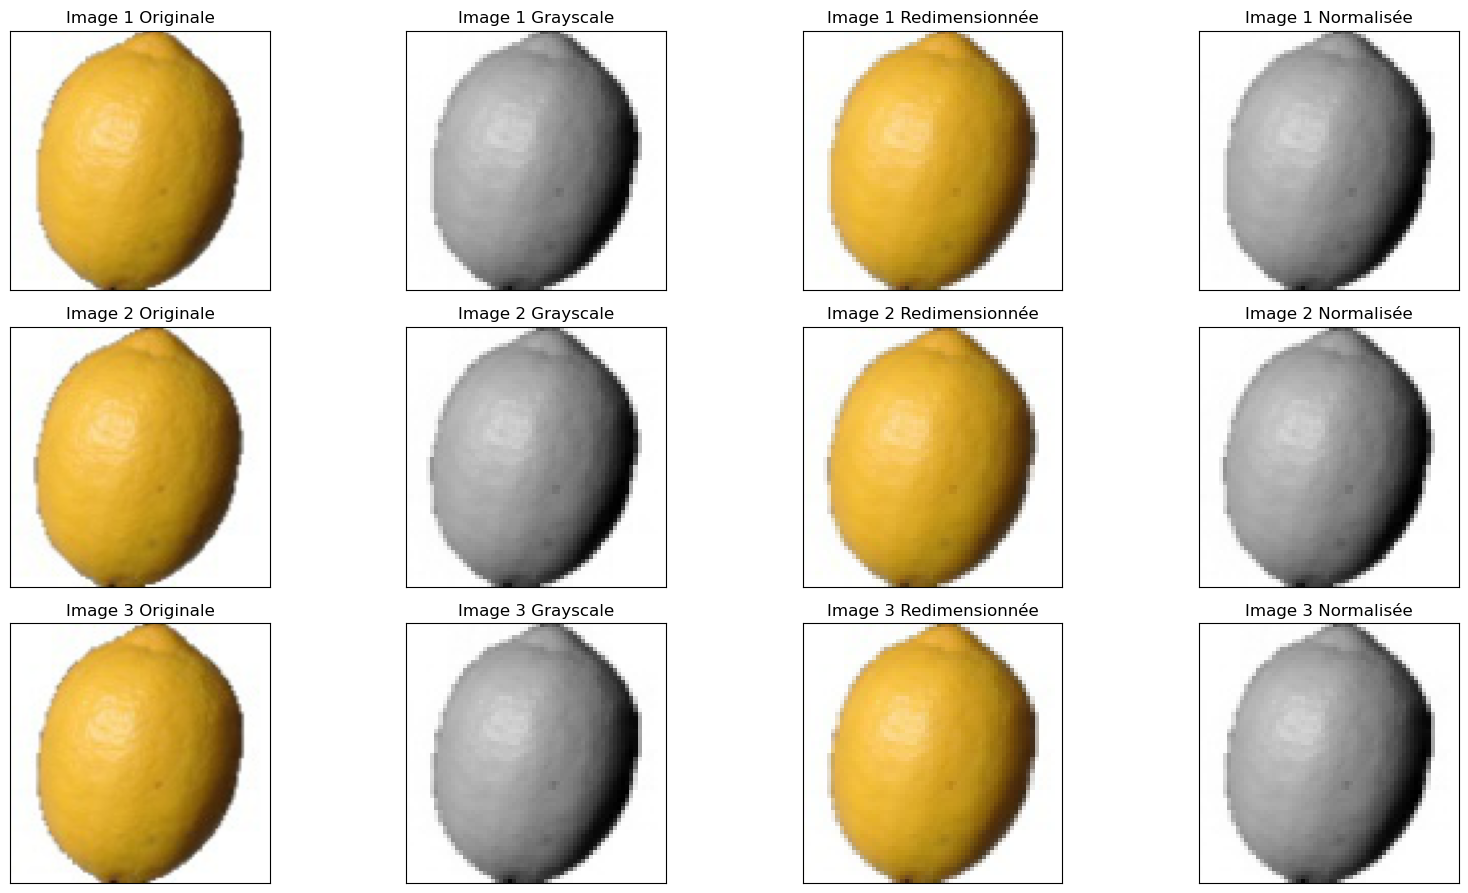

In [151]:
# **Affichage des images à chaque étape de transformation**

plt.figure(figsize=(16, 12))
for j, (img, img_resized, img_gray, img_norm) in enumerate(zip(IMGS, IMGS_RESIZED, IMGS_GREY, IMGS_NORM)):
    # Image originale
    plt.subplot(4, 4, j * 4 + 1)
    plt.imshow(img)
    plt.xticks([]), plt.yticks([])
    plt.title(f"Image {j+1} Originale")

    # Image en niveaux de gris
    plt.subplot(4, 4, j * 4 + 2)
    plt.imshow(img_gray, cmap="gray")
    plt.xticks([]), plt.yticks([])
    plt.title(f"Image {j+1} Grayscale")

    # Image redimensionnée
    plt.subplot(4, 4, j * 4 + 3)
    plt.imshow(img_resized , cmap="gray")
    plt.xticks([]), plt.yticks([])
    plt.title(f"Image {j+1} Redimensionnée")

    # Image normalisée
    plt.subplot(4, 4, j * 4 + 4)
    plt.imshow(img_norm, cmap="gray")
    plt.xticks([]), plt.yticks([])
    plt.title(f"Image {j+1} Normalisée")

plt.tight_layout()
plt.show()


In [98]:
# **Exercice 3 : Extraction et analyse de caractéristiques**

# 1. Vectorisation des images
def vectorisation(img):
    return img.ravel(), img.shape

# 2. Calcul des statistiques (moyenne, écart-type, histogramme)
def calc_stats(img):
    mean = np.mean(img)
    std_dev = np.std(img)
    hist, bins = np.histogram(img, bins=16, range=(0, 256))
    return mean, std_dev, hist

# 3. Calcul des caractéristiques pour chaque image
stats = []
for i, img in enumerate(IMGS_GREY):
    mean, std_dev, hist = calc_stats(img)
    stats.append({
        "Image": f"Image {i+1}",
        "Mean Intensity": mean,
        "Standard Deviation": std_dev,
        "Histogram": hist.tolist()
    })
    # Afficher les statistiques dans la console
    print(f"Statistiques pour Image {i+1}:")
    print(f"  - Moyenne des intensités : {mean:.2f}")
    print(f"  - Écart-type des intensités : {std_dev:.2f}")
    print(f"  - Histogramme des niveaux de gris (16 bins) : {hist}")
    print()

# Sauvegarder les caractéristiques dans un fichier CSV
df_stats = pd.DataFrame(stats)
df_stats.to_csv('image_stats.csv', index=False)
print("Les caractéristiques ont été sauvegardées dans le fichier 'image_stats.csv'.")


Statistiques pour Image 1:
  - Moyenne des intensités : 191.43
  - Écart-type des intensités : 59.23
  - Histogramme des niveaux de gris (16 bins) : [   0    0   18  118   81  105  143  158  251  303  348  513  388  122
   44 1504]

Statistiques pour Image 2:
  - Moyenne des intensités : 191.24
  - Écart-type des intensités : 59.26
  - Histogramme des niveaux de gris (16 bins) : [   0    0   30  110   82  102  139  157  247  307  364  510  384  126
   45 1493]

Statistiques pour Image 3:
  - Moyenne des intensités : 191.41
  - Écart-type des intensités : 59.39
  - Histogramme des niveaux de gris (16 bins) : [   0    0   24  130   82   91  135  151  214  338  358  539  367  123
   45 1499]

Les caractéristiques ont été sauvegardées dans le fichier 'image_stats.csv'.


In [99]:
# **Exercice 5 : Augmentation des données**

# Fonction d'augmentation des données
def rotation(img):
    return cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)

def translation(img, tx, ty):
    matrix = np.float32([[1, 0, tx], [0, 1, ty]])
    return cv2.warpAffine(img, matrix, (img.shape[1], img.shape[0]))

def zoom(img, factor):
    height, width = img.shape[:2]
    center = (width / 2, height / 2)
    matrix = cv2.getRotationMatrix2D(center, 0, factor)
    return cv2.warpAffine(img, matrix, (width, height))

def flip_horizontal(img):
    return cv2.flip(img, 1)

def flip_vertical(img):
    return cv2.flip(img, 0)

# Appliquer les augmentations
def generate_augmented_images(img):
    augmented_images = []
    augmented_images.append(rotation(img))
    augmented_images.append(translation(img, 10, 10))  # translation de 10 pixels
    augmented_images.append(zoom(img, 1.2))  # Zoom de 1.2x
    augmented_images.append(flip_horizontal(img))  # Flip horizontal
    augmented_images.append(flip_vertical(img))  # Flip vertical
    return augmented_images

# Générer les images augmentées pour chaque image prétraitée
augmented_images_list = [generate_augmented_images(img) for img in IMGS_NORM]


In [103]:
# Sauvegarder les images augmentées dans un dossier
augmented_folder = "augmented_images"
if not os.path.exists(augmented_folder):
    os.makedirs(augmented_folder)

# Sauvegarder les images augmentées
for idx, augmented_images in enumerate(augmented_images_list):
    for i, img in enumerate(augmented_images):
        filename = f"{augmented_folder}/augmented_image_{idx+1}_{i+1}.jpg"
        img_to_save = (img * 255).astype(np.uint8)
        cv2.imwrite(filename, img_to_save)
        print(f"Image augmentée sauvegardée sous le nom '{filename}'")


Image augmentée sauvegardée sous le nom 'augmented_images/augmented_image_1_1.jpg'
Image augmentée sauvegardée sous le nom 'augmented_images/augmented_image_1_2.jpg'
Image augmentée sauvegardée sous le nom 'augmented_images/augmented_image_1_3.jpg'
Image augmentée sauvegardée sous le nom 'augmented_images/augmented_image_1_4.jpg'
Image augmentée sauvegardée sous le nom 'augmented_images/augmented_image_1_5.jpg'
Image augmentée sauvegardée sous le nom 'augmented_images/augmented_image_2_1.jpg'
Image augmentée sauvegardée sous le nom 'augmented_images/augmented_image_2_2.jpg'
Image augmentée sauvegardée sous le nom 'augmented_images/augmented_image_2_3.jpg'
Image augmentée sauvegardée sous le nom 'augmented_images/augmented_image_2_4.jpg'
Image augmentée sauvegardée sous le nom 'augmented_images/augmented_image_2_5.jpg'
Image augmentée sauvegardée sous le nom 'augmented_images/augmented_image_3_1.jpg'
Image augmentée sauvegardée sous le nom 'augmented_images/augmented_image_3_2.jpg'
Imag

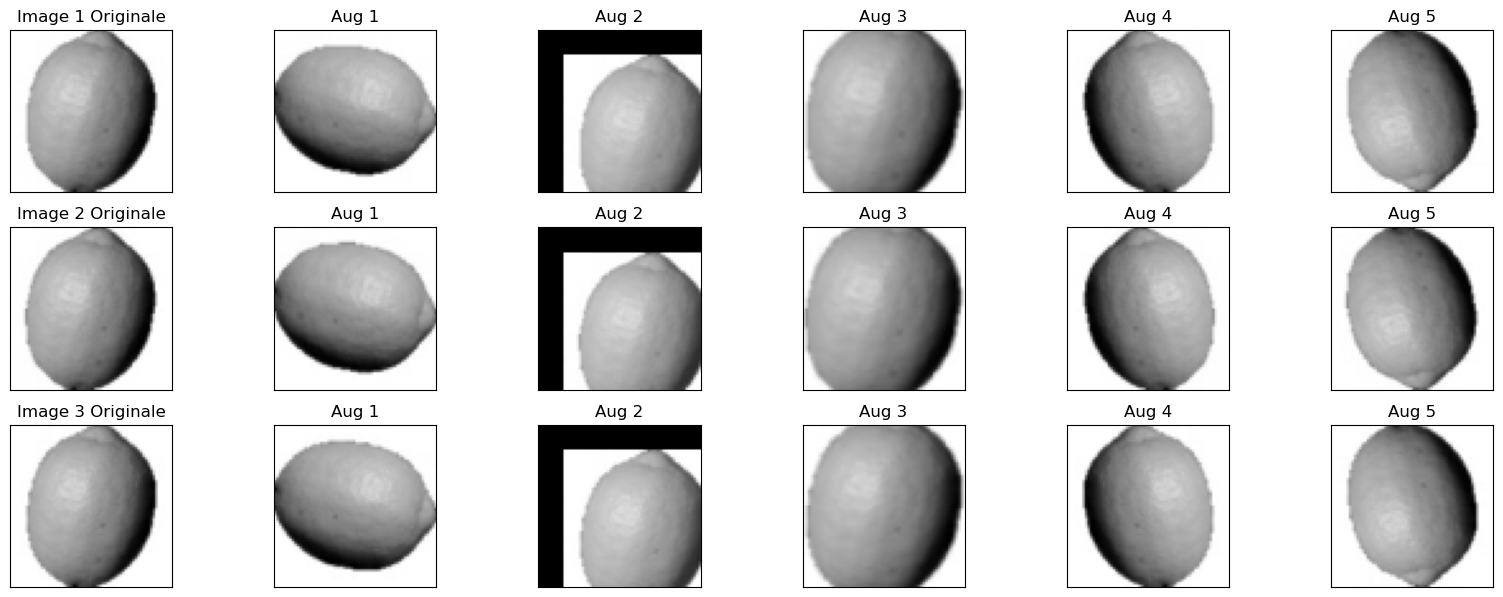

In [105]:
# **Visualisation des images augmentées**
plt.figure(figsize=(16, 12))
for j, (img, augmented_images) in enumerate(zip(IMGS_NORM, augmented_images_list)):
    plt.subplot(6, 6, j * 6 + 1)
    plt.imshow(img, cmap="gray")
    plt.xticks([]), plt.yticks([])
    plt.title(f"Image {j+1} Originale")
    for i, aug_img in enumerate(augmented_images):
        plt.subplot(6, 6, j * 6 + i + 2)
        plt.imshow(aug_img, cmap="gray")
        plt.xticks([]), plt.yticks([])
        plt.title(f"Aug {i+1}")
plt.tight_layout()
plt.show()


In [106]:
# Sauvegarde des images augmentées au format .npy
augmented_images_array = []
for augmented_images in augmented_images_list:
    augmented_images_array.extend(augmented_images)

augmented_images_np = np.array(augmented_images_array)
np.save('augmented_images.npy', augmented_images_np)
print("Les images augmentées ont été sauvegardées dans le fichier 'augmented_images.npy'.")


Les images augmentées ont été sauvegardées dans le fichier 'augmented_images.npy'.


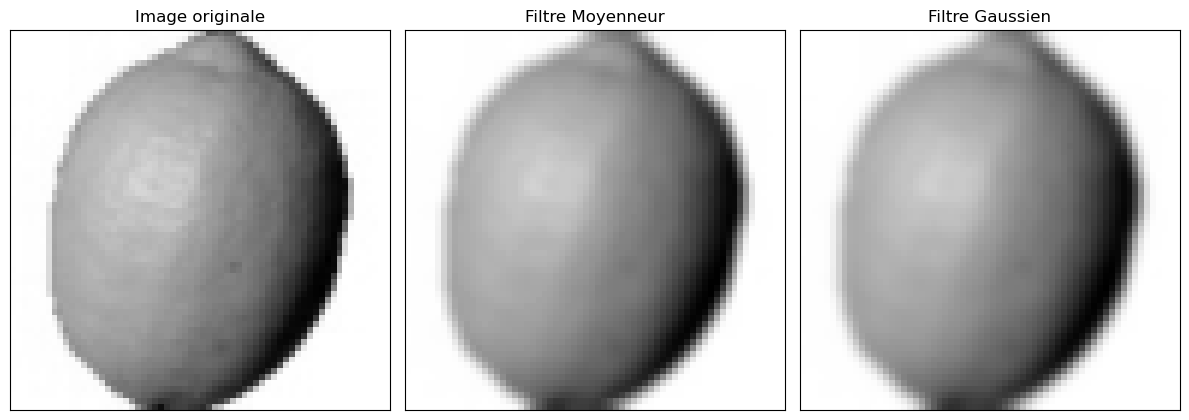

In [157]:
# Application de filtres linéaires
# 1. Appliquer un filtre de flou (moyenneur ou gaussien)
def filtre_flou(img, kernel_size=3):
    # Filtre moyenneur
    return cv2.blur(img, (kernel_size, kernel_size))

# Appliquer un filtre gaussien
def gaussian_flou(img, kernel_size=3):
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

# Appliquer les filtres
blurred_img = filtre_flou(IMGS_GREY[0], kernel_size=3)
gaussian_blurred_img = gaussian_flou(IMGS_GREY[0], kernel_size=5)

# Affichage des résultats
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(IMGS_GREY[0], cmap='gray')
plt.title("Image originale")
plt.xticks([]), plt.yticks([])

plt.subplot(1, 3, 2)
plt.imshow(blurred_img, cmap='gray')
plt.title("Filtre Moyenneur")
plt.xticks([]), plt.yticks([])

plt.subplot(1, 3, 3)
plt.imshow(gaussian_blurred_img, cmap='gray')
plt.title("Filtre Gaussien")
plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()


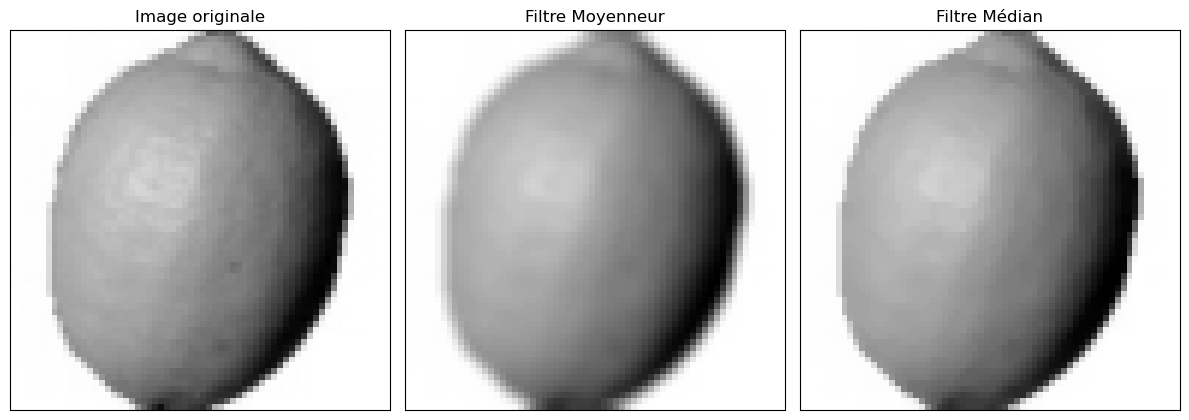

In [111]:
# 2. Appliquer un filtre médian pour réduire le bruit impulsif (sel et poivre)
def apply_median_filter(img, kernel_size=3):
    return cv2.medianBlur(img, kernel_size)

# Appliquer un filtre médian
median_filtered_img = apply_median_filter(IMGS_GREY[0], kernel_size=3)

# Affichage des résultats
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(IMGS_GREY[0], cmap='gray')
plt.title("Image originale")
plt.xticks([]), plt.yticks([])

plt.subplot(1, 3, 2)
plt.imshow(blurred_img, cmap='gray')
plt.title("Filtre Moyenneur")
plt.xticks([]), plt.yticks([])

plt.subplot(1, 3, 3)
plt.imshow(median_filtered_img, cmap='gray')
plt.title("Filtre Médian")
plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()


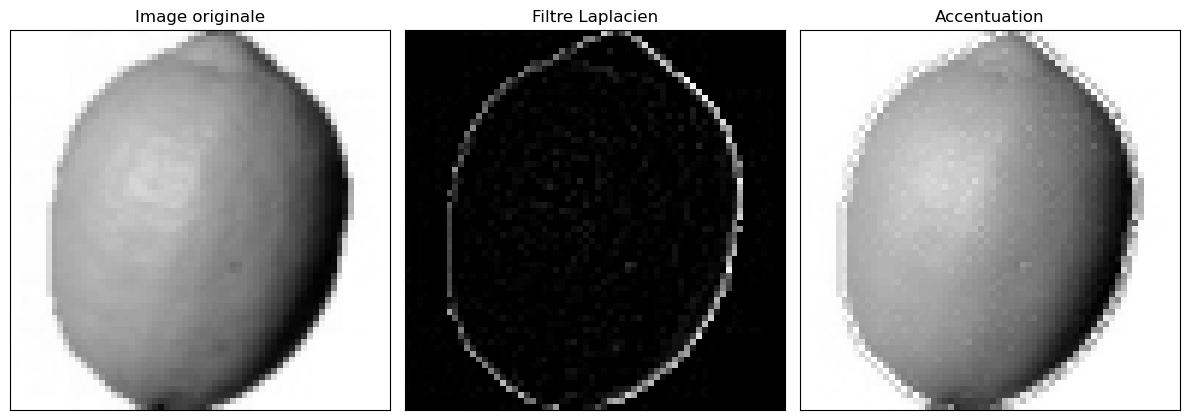

In [113]:
# 3. Filtrage d'accentuation avec le filtre de Laplace
def apply_laplace_filter(img):
    laplace_kernel = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]], dtype=np.float32)
    return cv2.filter2D(img, -1, laplace_kernel)

# Appliquer le filtre de Laplace pour l'accentuation
laplace_filtered_img = apply_laplace_filter(IMGS_GREY[0])

# Combine l'image filtrée avec l'image originale
accentuated_img = cv2.addWeighted(IMGS_GREY[0], 1, laplace_filtered_img, 1, 0)

# Affichage des résultats
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(IMGS_GREY[0], cmap='gray')
plt.title("Image originale")
plt.xticks([]), plt.yticks([])

plt.subplot(1, 3, 2)
plt.imshow(laplace_filtered_img, cmap='gray')
plt.title("Filtre Laplacien")
plt.xticks([]), plt.yticks([])

plt.subplot(1, 3, 3)
plt.imshow(accentuated_img, cmap='gray')
plt.title("Accentuation")
plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()


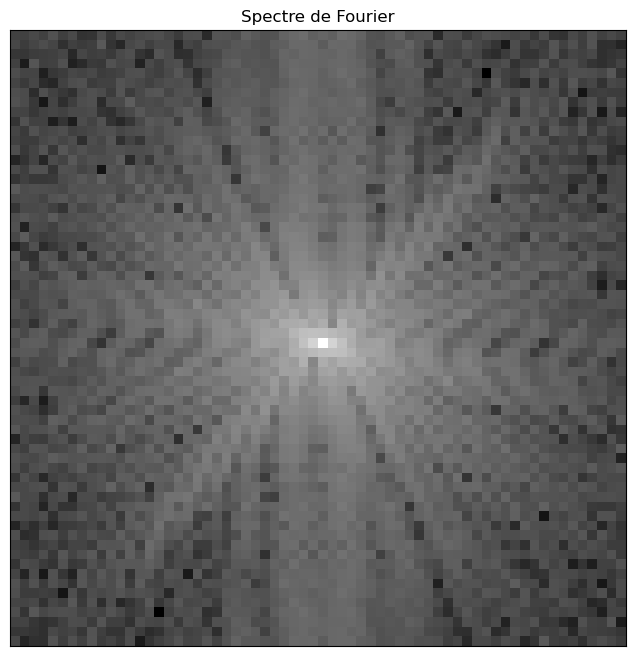

In [115]:
# 1. Transformation de Fourier Discrète (DFT)
def apply_dft(img):
    f = np.float32(img)
    dft = cv2.dft(f, flags=cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)
    return dft_shift

# Appliquer la DFT sur l'image
dft_img = apply_dft(IMGS_GREY[0])

# Visualiser le spectre de fréquences
magnitude_spectrum = cv2.magnitude(dft_img[:, :, 0], dft_img[:, :, 1])
plt.figure(figsize=(8, 8))
plt.imshow(np.log(magnitude_spectrum + 1), cmap='gray')
plt.title("Spectre de Fourier")
plt.xticks([]), plt.yticks([])
plt.show()


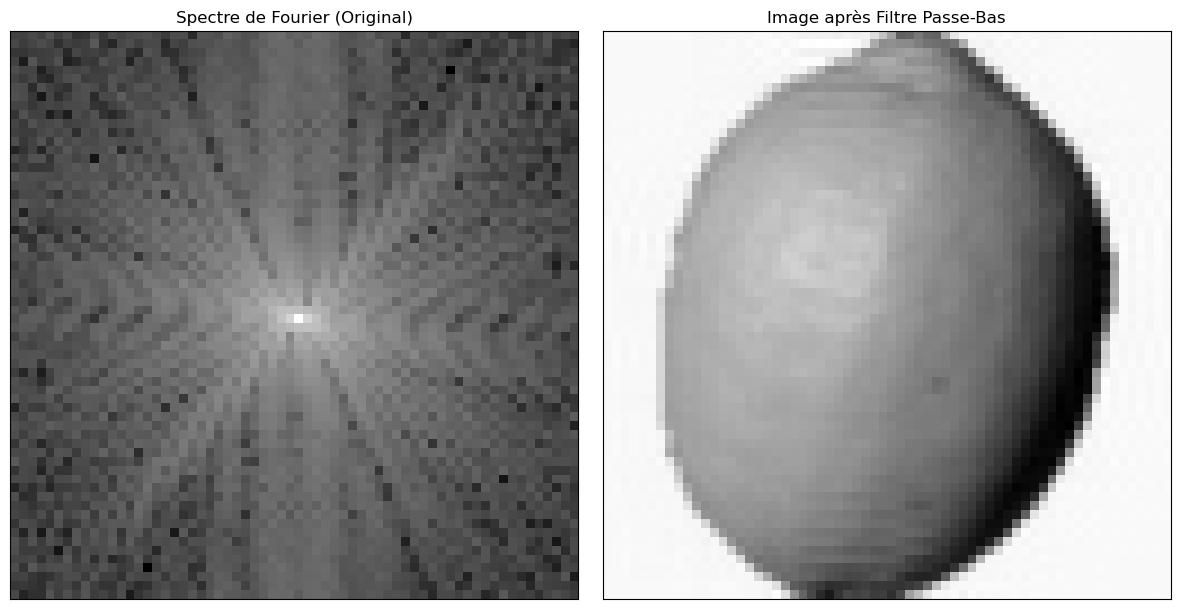

In [117]:
# 2. Filtrage Passe-Bas
def low_pass_filter(dft_shift, cutoff=30):
    rows, cols = dft_shift.shape[:2]
    crow, ccol = rows // 2, cols // 2
    mask = np.zeros((rows, cols, 2), np.float32)
    mask[crow - cutoff:crow + cutoff, ccol - cutoff:ccol + cutoff] = 1
    return dft_shift * mask

# Appliquer le filtre passe-bas
dft_img_low_pass = low_pass_filter(dft_img)

# Inverse de Fourier (Transformation inverse)
def inverse_dft(dft_shift):
    dft_ishift = np.fft.ifftshift(dft_shift)
    img_back = cv2.idft(dft_ishift)
    img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])
    return img_back

# Filtrage et retour à l'image
img_low_pass = inverse_dft(dft_img_low_pass)

# Affichage des résultats
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(np.log(magnitude_spectrum + 1), cmap='gray')
plt.title("Spectre de Fourier (Original)")
plt.xticks([]), plt.yticks([])

plt.subplot(1, 2, 2)
plt.imshow(img_low_pass, cmap='gray')
plt.title("Image après Filtre Passe-Bas")
plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()


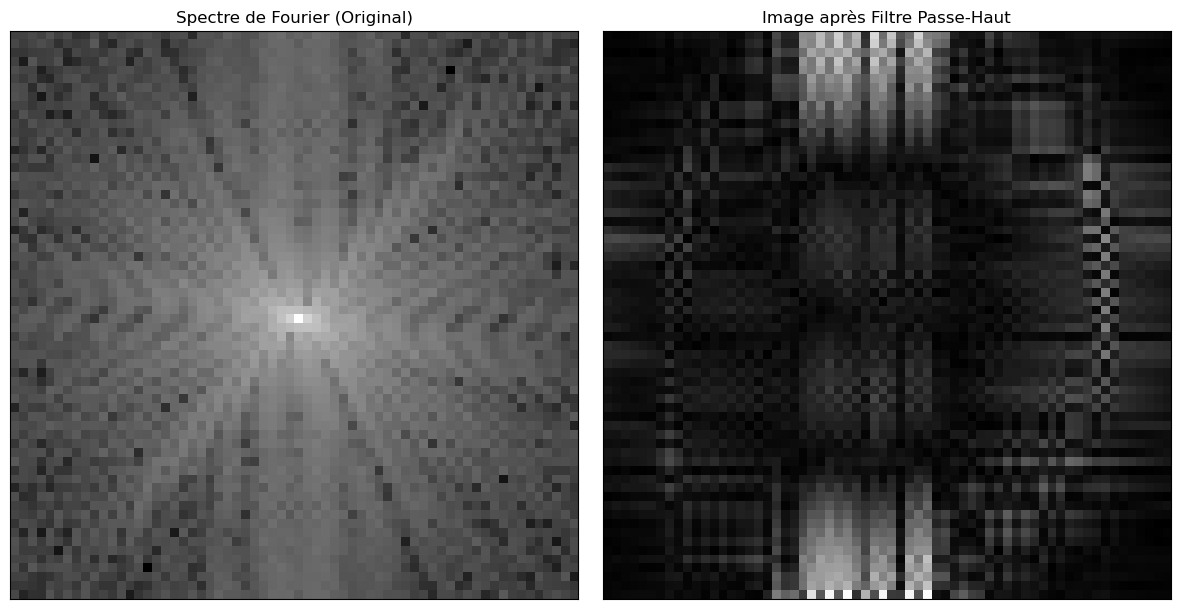

In [119]:
# 3. Filtrage Passe-Haut
def high_pass_filter(dft_shift, cutoff=30):
    rows, cols = dft_shift.shape[:2]
    crow, ccol = rows // 2, cols // 2
    mask = np.ones((rows, cols, 2), np.float32)
    mask[crow - cutoff:crow + cutoff, ccol - cutoff:ccol + cutoff] = 0
    return dft_shift * mask

# Appliquer le filtre passe-haut
dft_img_high_pass = high_pass_filter(dft_img)

# Filtrage et retour à l'image
img_high_pass = inverse_dft(dft_img_high_pass)

# Affichage des résultats
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(np.log(magnitude_spectrum + 1), cmap='gray')
plt.title("Spectre de Fourier (Original)")
plt.xticks([]), plt.yticks([])

plt.subplot(1, 2, 2)
plt.imshow(img_high_pass, cmap='gray')
plt.title("Image après Filtre Passe-Haut")
plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()


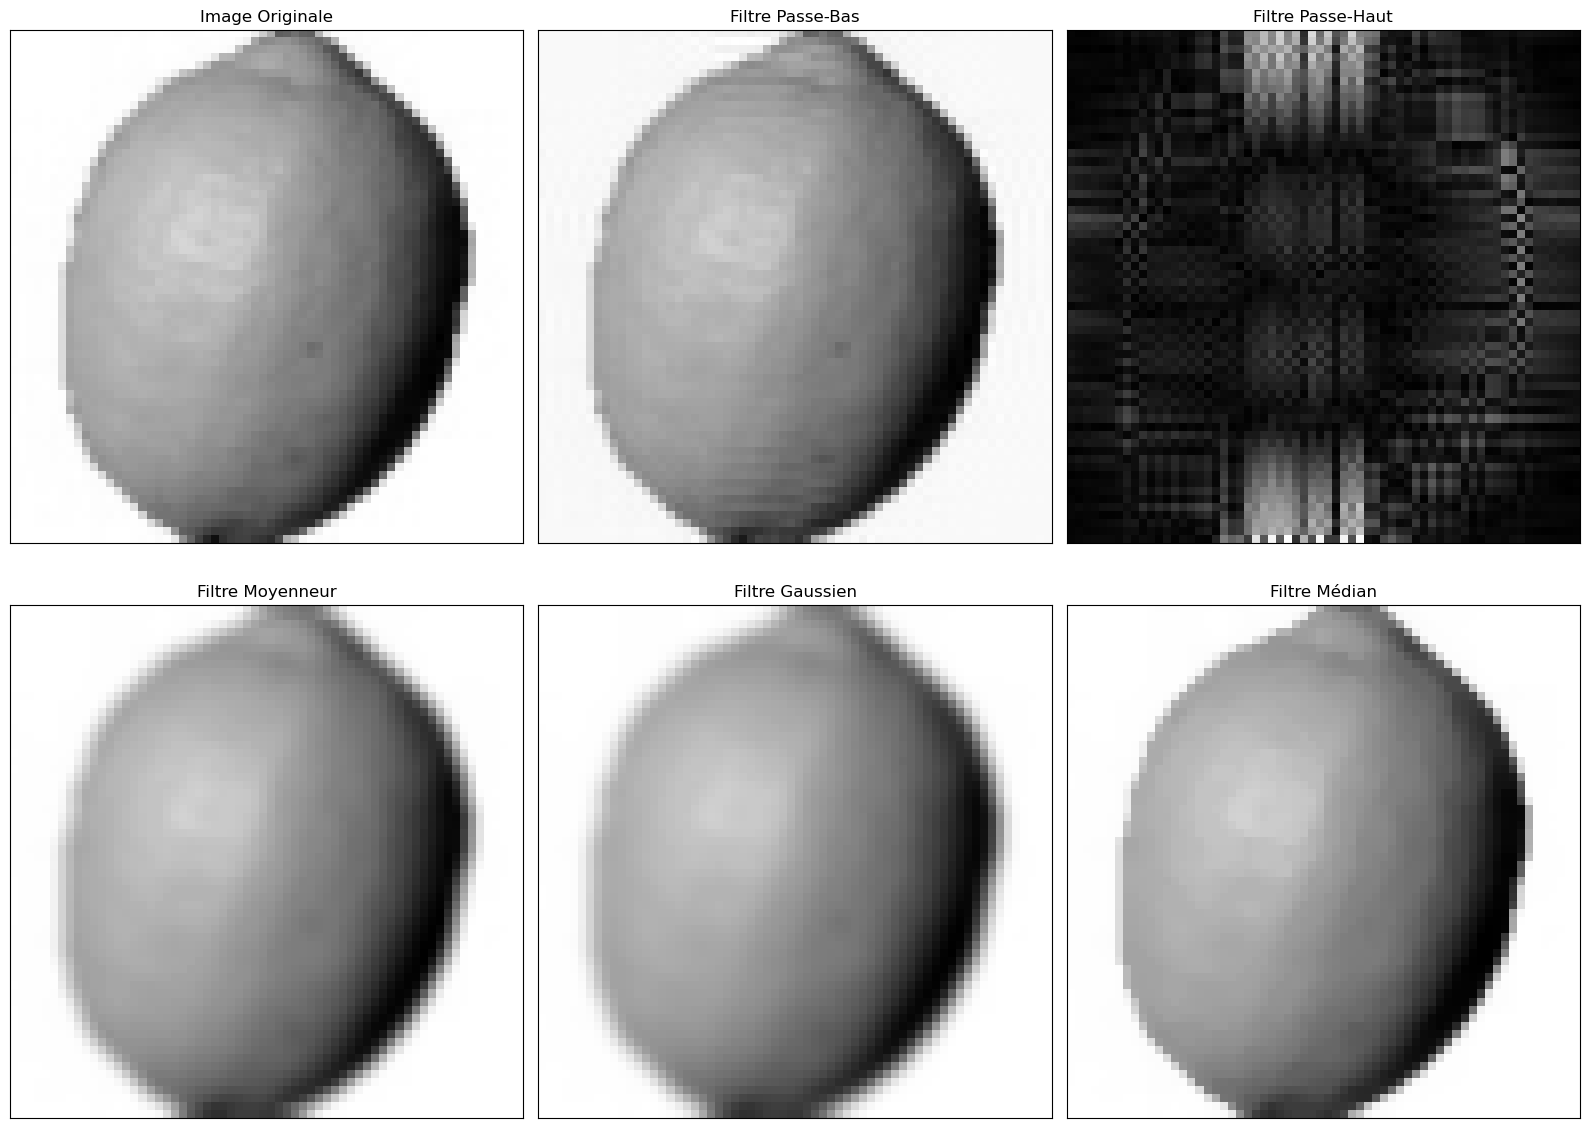

In [121]:
# Comparer les résultats des filtres passe-bas, passe-haut et les filtres spatiaux
plt.figure(figsize=(16, 12))
plt.subplot(2, 3, 1)
plt.imshow(IMGS_GREY[0], cmap='gray')
plt.title("Image Originale")
plt.xticks([]), plt.yticks([])

plt.subplot(2, 3, 2)
plt.imshow(img_low_pass, cmap='gray')
plt.title("Filtre Passe-Bas")
plt.xticks([]), plt.yticks([])

plt.subplot(2, 3, 3)
plt.imshow(img_high_pass, cmap='gray')
plt.title("Filtre Passe-Haut")
plt.xticks([]), plt.yticks([])

plt.subplot(2, 3, 4)
plt.imshow(blurred_img, cmap='gray')
plt.title("Filtre Moyenneur")
plt.xticks([]), plt.yticks([])

plt.subplot(2, 3, 5)
plt.imshow(gaussian_blurred_img, cmap='gray')
plt.title("Filtre Gaussien")
plt.xticks([]), plt.yticks([])

plt.subplot(2, 3, 6)
plt.imshow(median_filtered_img, cmap='gray')
plt.title("Filtre Médian")
plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()
